In [50]:
import dask.dataframe as dd

In [51]:
df = dd.read_csv("owid-covid-data.csv", dtype={
    'new_cases': 'float64',
    'new_deaths': 'float64',
    'tests_units': 'object',
    'total_cases': 'float64',
    'total_deaths': 'float64'
})

df.head()


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index,population,excess_mortality
0,AFG,Asia,Afghanistan,29/03/2020 00:00,91.0,67.0,2.0,2.0,2.243,1.651,...,NaN,597.029,9.59,NaN,NaN,37.746,64.83,0.511,41128772,NaN
1,AFG,Asia,Afghanistan,30/03/2020 00:00,91.0,0.0,2.0,0.0,2.243,0.000,...,NaN,597.029,9.59,NaN,NaN,37.746,64.83,0.511,41128772,NaN
2,AFG,Asia,Afghanistan,31/03/2020 00:00,91.0,0.0,2.0,0.0,2.243,0.000,...,NaN,597.029,9.59,NaN,NaN,37.746,64.83,0.511,41128772,NaN
3,AFG,Asia,Afghanistan,01/04/2020 00:00,91.0,0.0,2.0,0.0,2.243,0.000,...,NaN,597.029,9.59,NaN,NaN,37.746,64.83,0.511,41128772,NaN
4,AFG,Asia,Afghanistan,02/04/2020 00:00,91.0,0.0,2.0,0.0,2.243,0.000,...,NaN,597.029,9.59,NaN,NaN,37.746,64.83,0.511,41128772,NaN


In [52]:
df.isnull().sum().compute()

iso_code                          0
continent                      1076
location                          0
date                              0
total_cases                    1710
new_cases                      1714
total_deaths                   1710
new_deaths                     1713
total_cases_per_million        1710
new_cases_per_million          1714
total_deaths_per_million       1710
new_deaths_per_million         1713
reproduction_rate                 0
icu_patients                 155918
icu_patients_per_million     155918
hosp_patients                155689
hosp_patients_per_million    155689
total_tests                  110828
new_tests                    114525
total_tests_per_thousand     110828
new_tests_per_thousand       114525
positive_rate                 94065
total_vaccinations           130964
people_vaccinated            133712
people_fully_vaccinated      136978
total_boosters               156641
new_vaccinations             141389
stringency_index            

In [53]:
df['continent'].unique().compute()

0             Asia
1           Europe
2           Africa
3    North America
4    South America
5          Oceania
6             <NA>
Name: continent, dtype: string

In [54]:
df['continent']=df['continent'].fillna("Unknown")
df['total_cases'] = df['total_cases'].fillna(0)
df['new_cases'] = df['new_cases'].fillna(0)
df['total_deaths'] = df['total_deaths'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)
df['total_cases_per_million'] = df['total_cases_per_million'].fillna(0)
df['new_cases_per_million'] = df['new_cases_per_million'].fillna(0)
df['total_deaths_per_million'] = df['total_deaths_per_million'].fillna(0)
df['new_deaths_per_million'] = df['new_deaths_per_million'].fillna(0)
df['icu_patients'] = df['icu_patients'].fillna(0)
df['icu_patients_per_million'] = df['icu_patients_per_million'].fillna(0)
df['hosp_patients'] = df['hosp_patients'].fillna(0)
df['hosp_patients_per_million'] = df['hosp_patients_per_million'].fillna(0)
df['total_tests'] = df['total_tests'].fillna(0)

In [55]:
df = df.drop("handwashing_facilities",axis=1)
df = df.drop("life_expectancy",axis=1)
df = df.drop("excess_mortality",axis=1)

In [56]:
df['new_tests'] = df['new_tests'].fillna(0)
df['total_tests_per_thousand'] = df['total_tests_per_thousand'].fillna(0)
df['new_tests_per_thousand'] = df['new_tests_per_thousand'].fillna(0)
df['positive_rate'] = df['positive_rate'].fillna(0)
df['total_vaccinations'] = df['total_vaccinations'].fillna(0)
df['people_vaccinated'] = df['people_vaccinated'].fillna(0)
df['people_fully_vaccinated'] = df['people_fully_vaccinated'].fillna(0)
df['total_boosters'] = df['total_boosters'].fillna(0)
df['new_vaccinations'] = df['new_vaccinations'].fillna(0)
df['stringency_index'] = df['stringency_index'].fillna(0)
df['population_density'] = df['population_density'].fillna(0)
df['extreme_poverty'] = df['extreme_poverty'].fillna(0)
df['gdp_per_capita'] = df['gdp_per_capita'].fillna(0)
df['cardiovasc_death_rate'] = df['cardiovasc_death_rate'].fillna(0)
df['diabetes_prevalence'] = df['diabetes_prevalence'].fillna(0)
df['female_smokers'] = df['female_smokers'].fillna(0)
df['male_smokers'] = df['male_smokers'].fillna(0)
df['human_development_index'] = df['human_development_index'].fillna(0)
df['total_cases'] = df['total_cases'].fillna(0)
df['total_cases'] = df['total_cases'].fillna(0)
df['total_cases'] = df['total_cases'].fillna(0)

In [57]:
mean_age = df['median_age'].mean().compute()
df['median_age'] = df['median_age'].fillna(mean_age)
mean_65 = df['aged_65_older'].mean().compute()
df['aged_65_older'] = df['aged_65_older'].fillna(mean_65)
mean_70 = df['aged_70_older'].mean().compute()
df['aged_70_older'] = df['aged_70_older'].fillna(mean_70)

In [58]:
df['continent'].unique().compute()

0             Asia
1           Europe
2           Africa
3    North America
4    South America
5          Oceania
6          Unknown
Name: continent, dtype: string

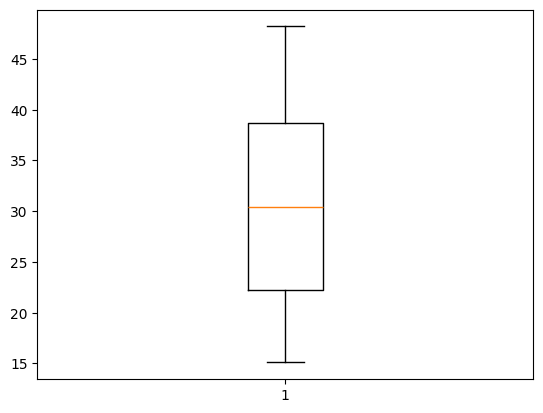

In [59]:
import matplotlib.pyplot as plt

plt.boxplot(df["median_age"])
plt.show()

In [60]:
#change to lowercase
df["location"] = df["location"].str.lower()

#remove extra spaces
df["location"] = df["location"].str.strip()

#manage spelling mistakes
df["location"] = df["location"].replace({
    "Unted Kingdom": "united kingdom",
    "England": "united kingdom"
})


In [61]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,human_development_index,population
0,AFG,Asia,afghanistan,29/03/2020 00:00,91.0,67.0,2.0,2.0,2.243,1.651,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.511,41128772
1,AFG,Asia,afghanistan,30/03/2020 00:00,91.0,0.0,2.0,0.0,2.243,0.000,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.511,41128772
2,AFG,Asia,afghanistan,31/03/2020 00:00,91.0,0.0,2.0,0.0,2.243,0.000,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.511,41128772
3,AFG,Asia,afghanistan,01/04/2020 00:00,91.0,0.0,2.0,0.0,2.243,0.000,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.511,41128772
4,AFG,Asia,afghanistan,02/04/2020 00:00,91.0,0.0,2.0,0.0,2.243,0.000,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.511,41128772


In [62]:
df.to_csv('covid-data-cleaned.csv', single_file=True)

['C:\\Users\\User\\Documents\\AI and Data Science\\GitHub\\TheMathLab\\COVID-19_Big_Data_Analysis\\covid-data-cleaned.csv']